In [1]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt

from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import roc_auc_score


In [2]:
# Load full prepared data (train + val)
X = pd.read_csv('../data/processed/X_train.csv')
y = pd.read_csv('../data/processed/y_train.csv').values.ravel()

# Load best model (Random Forest)
model = joblib.load('../models/random_forest.pkl')

print("Data shape:", X.shape)
print("Churn rate:", y.mean())


Data shape: (2158, 24)
Churn rate: 0.381371640407785


In [3]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(
    model,
    X,
    y,
    cv=skf,
    scoring='roc_auc'
)

print("Cross-Validation ROC-AUC Scores:")
print(cv_scores)


Cross-Validation ROC-AUC Scores:
[0.75364885 0.76797185 0.77040064 0.69873025 0.73364849]


In [4]:
cv_mean = cv_scores.mean()
cv_std = cv_scores.std()

print(f"Mean ROC-AUC: {cv_mean:.4f}")
print(f"Std Deviation: {cv_std:.4f}")


Mean ROC-AUC: 0.7449
Std Deviation: 0.0265


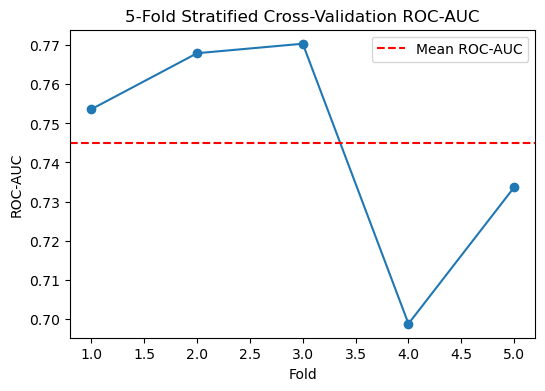

In [5]:
plt.figure(figsize=(6,4))
plt.plot(range(1, 6), cv_scores, marker='o')
plt.axhline(cv_mean, linestyle='--', color='red', label='Mean ROC-AUC')
plt.xlabel("Fold")
plt.ylabel("ROC-AUC")
plt.title("5-Fold Stratified Cross-Validation ROC-AUC")
plt.legend()
plt.savefig('../visualizations/cross_validation_scores.png')
plt.show()


# Q1: Why use cross-validation?

Cross-validation provides a more reliable estimate of model performance by evaluating it on multiple train-validation splits. This reduces dependency on a single split and helps detect overfitting.

# Q2: What is stratified k-fold?

Stratified k-fold ensures that each fold maintains the same class distribution (churn vs active) as the original dataset, which is critical for imbalanced classification problems.

# Q3: How do you interpret the results?

The mean ROC-AUC represents expected model performance, while the standard deviation indicates stability. A low standard deviation shows consistent performance across folds.